# KNN Classification: Heart Disease

## Introduction
___

**Heart diseases**, which are caused by the narrowing of blood vessels, are the most common cause of death globally (CDC 2022). Risk factors, such as age, sex, blood pressure, or cholesterol levels (Hajar 2017) help us predict whether or not a patient has heart disease.

The K-Nearest Neighbor (KNN) algorithm is used to predict a categorical class for an observation (Fix and Hodges 1951; Cover and Hart 1967). We can use this to predict whether or not someone is likely to have heart disease based on their medical information. Therefore, this analysis asks: **Can we create a KNN classification model that accurately predicts a patient's heart disease diagnosis based on their medical information?**

The *Heart Disease* dataset (1988) contains patients' information, such as age or cholesterol, which will be used as predictors. The dataset also includes the patients' heart disease diagnoses, which is classified categorically as as 0 (no heart disease) or greater than zero (heart disease). Here, the 'presence' of heart disease refers to >50% narrowing in any major blood vessel. The data is taken from four different locations Cleveland (USA), Hungary, Switzerland, Long Beach (USA).

## Methods
____

### 1. Loading and Cleaning Data

Let's start by installing `tidyverse`, which has functions which will help us to load and clean up our data. `tidymodels` contains the tools we need to create a KNN model. 

In [15]:
# Install these libraries before continuing
library(tidyverse)
library(tidymodels)

options(repr.matrix.max.rows = 6)

Each location from which data was collected has a separate `.csv` file which must be loaded and read using `read_csv()`. We must add manually add column names.

In [16]:
# Reading data from web (stored in github repo)
cleveland_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.cleveland.csv"
hungarian_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.hungarian.csv"
switzerland_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.switzerland.csv"
beach_url <-  "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.va.csv"

names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thanl", "num")

cleveland <- read_csv(cleveland_url, col_names = names)
hungarian <- read_csv(hungarian_url, col_names = names)
switzerland <- read_csv(switzerland_url, col_names = names)
beach <- read_csv(beach_url, col_names = names)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thanl
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thanl
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thanl
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to r

Here is one of the dataframes:

In [17]:
hungarian

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thanl,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


The data includes information of patients, from `age` to `thanl`, which will be discussed in greater detail. The `num` column contains the heart disease diagnosis.

The data is already 'tidy', but the dataframes must be combined into one. `bind_rows` will keep the column names the same and join the dataframes vertically. However, each dataset has different types for each column. It is simplest to change all columns of the datasets to the same type, doubles, *then* join them.

In [18]:
# Changing all columns to doubles to be able to combine the 4 dataframes
cleveland <- mutate_all(cleveland, as.double)
hungarian <- mutate_all(hungarian, as.double)
switzerland <- mutate_all(switzerland, as.double)
beach <- mutate_all(beach, as.double)

# Bind rows
heart_data_combined <- bind_rows(cleveland, hungarian, switzerland, beach)
heart_data_combined

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = .Primitive("as.double")(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = .Primitive("as.double")(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = .Primitive("as.double")(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = .Primitive("as.double")(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see 

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thanl,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1


(The warnings mean `?` values have been replaced with NA.)

The combined dataframe has information from **920** patients (from the size).

In [19]:
num_summary <- heart_data_combined |>
    group_by(num) |>
    summarize(count = n())

Table 1: `num` summary before processing

In [20]:
num_summary

num,count
<dbl>,<int>
0,411
1,265
2,109
3,107
4,28


From the table above, `num` includes values from **0** to **4**. From the database description, 0 indicates the absence of heart disease, whereas values 1-4 suggest the presence of heart disease in increasing severity.

Our goal is only to classify the absence or presence of heart disease. Also, Hungarian data does not use the 1-4 scale and only uses the absence (0) and presence (1) classification.

We will simplify this by making all values from 1-4 into 1, so that:

- **`num = 0`** indicates the **absence** of patient disease (<50% narrowing of blood vessel diameter)
- **`num = 1`** indicates the **presence** of patient disease (>50% narrowing of blood vessel diameter)

We also need to change `num` from a double to a factor, which  must be done before training the model.

In [21]:
heart_adjusted <- heart_data_combined |>
    mutate(num = ifelse(num %in% 1:4, 1, num)) |> # Change num values 1-4 to one
    mutate(num = as_factor(num)) # Convert to factor

heart_adjusted

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thanl,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,1
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1


Look at all columns except `num`. They include continous predictors like `age`, and categorical predictors like `cp`, (chest pain type). To be used properly as predictors, categorical variables require preprocessing which is outside of the scope of this report.

Also, we will remove observations with NAs from the data. Reducing the number of possible predictors before splitting the data into training and testing reduces the amount of lost information. For example, `thanl` might have lots of NAs, but if `thanl` is not used, these observations do not need to be removed.

So, let's select only our continuous predictors and remove categorical predictors, then filter out NA values.
This leaves us with:

- **`age`**: patient age (years)
- **`chol`**: serum cholesterol (mg/dl)
- **`trestbps`**: resting blood pressure (mmHg)
- **`thalach`**: maximum heart rate achieved during exercise (bps)
- **`oldpeak`**: ST depressing induced relative to exercise (this is a ratio)

(We are *not yet choosing* these as our final predictors).

There is also an incorrect value where `chol` is 0 to remove.

In [22]:
clean_heart <- heart_adjusted |>
    select(age, chol, trestbps, thalach, oldpeak, num) |>
    filter(!is.na(age), !is.na(chol), !is.na(trestbps), !is.na(thalach), !is.na(oldpeak), !is.na(num)) |> # Remove NAs
    filter(chol != 0)

clean_heart

age,chol,trestbps,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,150,2.3,0
67,286,160,108,1.5,1
67,229,120,129,2.6,1
⋮,⋮,⋮,⋮,⋮,⋮
54,333,127,154,0,1
55,223,122,100,0,1
62,254,120,93,0,1


We now have 672 rows, a workable amount of data, which will be split into:

- **training data** to train our model on.
- **testing data** to test the model's accuracy on.

We will split the data into 75% training and 25% testing. This is a random, unbiased process. Setting the seed allows this to be reproduced.

In [23]:
# Split data into training (75%) and testing (25%) data
set.seed(1234)                    

heart_split <- initial_split(clean_heart, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

arrange(heart_train, age)
arrange(heart_test, age)

age,chol,trestbps,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,132,130,185,0,0
29,204,130,202,0,0
29,243,120,160,0,0
⋮,⋮,⋮,⋮,⋮,⋮
76,197,140,116,1.1,0
77,304,125,162,0.0,1
77,171,124,110,2.0,1


age,chol,trestbps,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
30,237,170,170,0,0
31,219,100,150,0,0
32,225,110,184,0,0
⋮,⋮,⋮,⋮,⋮,⋮
68,193,144,141,3.4,1
69,216,122,84,0.0,1
70,192,170,129,3.0,1


### 2. Preliminary Analysis

#### 2a. Data summaries

We have the clean data that will be used in the model, but let's first explore the training data. We visualize the training data because this is the data the model will actually learn from.

In [24]:
heart_predictors <- heart_train |>
    select(age, chol, trestbps, thalach, oldpeak)
        
heart_means <- heart_predictors |>
    map_df(mean)

heart_max <- heart_predictors |>
    map_df(max)

heart_min <- heart_predictors |>
    map_df(min)

summaries <- bind_rows(heart_means, heart_max, heart_min)

summary_table <- tibble(summary = c("mean", "max", "min")) |>
    bind_cols(summaries)

Table 2: Data Summary

In [25]:
summary_table

summary,age,chol,trestbps,thalach,oldpeak
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mean,52.82107,248.1113,132.9304,140.5964,0.9151093
max,77.00000,603.0000,200.0000,202.0000,6.2000000
min,28.00000,85.0000,92.0000,69.0000,0.0000000


These values tell us generally about the data has been collected. They also have implications for how we will be able to use our model. For example, `age` only ranges between 28 and 77. If we used this as our predictor, the model may not be as accurate for people younger or older than this range, but it will be accurate for somebody with an age of 77, the training data's mean age.

Let's look at `num`.

In [26]:
heart_obs <- heart_train |>
    group_by(num) |>
    summarize(count = n())

Table 3: `num` observations

num,count
<fct>,<int>
0,265
1,238


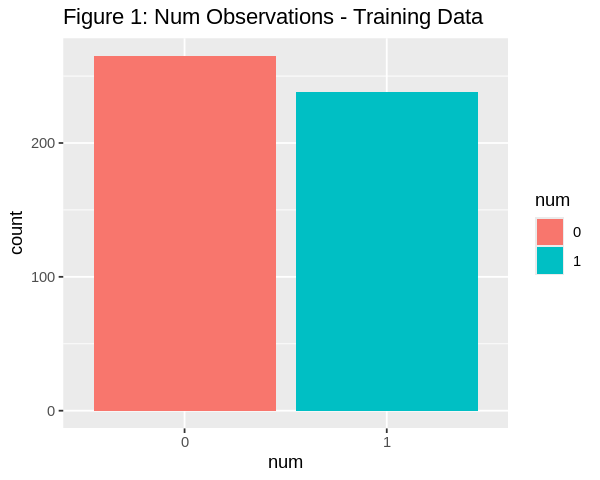

In [27]:
heart_obs 
options(repr.plot.width = 5, repr.plot.height = 4)

heart_obs_plot = heart_obs |> 
                    ggplot(aes(x = num, y = count)) +
                    geom_col(aes(fill = num)) +
                    ggtitle("Figure 1: Num Observations - Training Data")
heart_obs_plot

This tells us the number of 0 and 1 diagnoses present in the dataset are relatively even. This is good, because models perform optimally when the number of classes are balanced. If there were significantly more values where `num` was 0 than 1, the model would be biased towards predicting that `num` is 0.

#### 2b. Graphs (and Selecting Predictors)

We will generate two side-by-side **histograms** for each predictor, separated by `num`. This is a way of further understanding how our possible predictors are distributed, and will help us see if our predictors are relevant.

In [49]:
# Plots visualizing distribution of each variable, separated by diagnosis of heart disease
options(repr.plot.width = 9) # Alter to fit screen

# Renaming num for plots only to make the legend clearer
heart_train_renamed_num <- heart_train |>
                            mutate(diagnosis = case_when(
                                num == 0 ~ "No Heart Disease(<50% diameter narrowing)",
                                num == 1 ~ "Heart Disease (>50% diameter narrowing)"
                            ))

y_lab = "Number of People"
leg_lab = "Heart Disease Diagonis"
text_size = 15

plot_age <- ggplot(heart_train_renamed_num, aes(x = age)) +
    geom_histogram(aes(fill = diagnosis), binwidth = 5) +
    labs(x = "Age (Years)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Figure 2: Distribution of Age") +
    theme(text = element_text(size = text_size))

plot_chol <- ggplot(heart_train_renamed_num, aes(x = chol)) +
    geom_histogram(aes(fill = diagnosis), binwidth = 30) +
    labs(x = "Serum Cholesterol (mg/dl)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Figure 3: Distribution of Serum Cholesterol") +
    theme(text = element_text(size = text_size))

plot_trestbps <- ggplot(heart_train_renamed_num, aes(x = trestbps)) +
    geom_histogram(aes(fill = diagnosis), binwidth = 10) +
    labs(x = "Resting Blood Pressure (mmHg)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Figure 4: Distribution of Resting Blood Pressure") +
    theme(text = element_text(size = text_size))

plot_thalach <- ggplot(heart_train_renamed_num, aes(x = thalach)) +
    geom_histogram(aes(fill = diagnosis), binwidth = 10) +
    labs(x = "Maximum Heart Rate (bpm)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Figure 5: Distribution of Maximum Heart Rate") +
    theme(text = element_text(size = text_size))

plot_oldpeak <- ggplot(heart_train_renamed_num, aes(x = oldpeak)) +
    geom_histogram(aes(fill = diagnosis), binwidth = 0.4) +
    labs(x = "ST Depression Induced by Exercise Relative to Rest (Ratio)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    theme(text = element_text(size = text_size)) +
    ggtitle("Figure 6: Distribution of ST Depression Induced by Exercise Relative to Rest") 

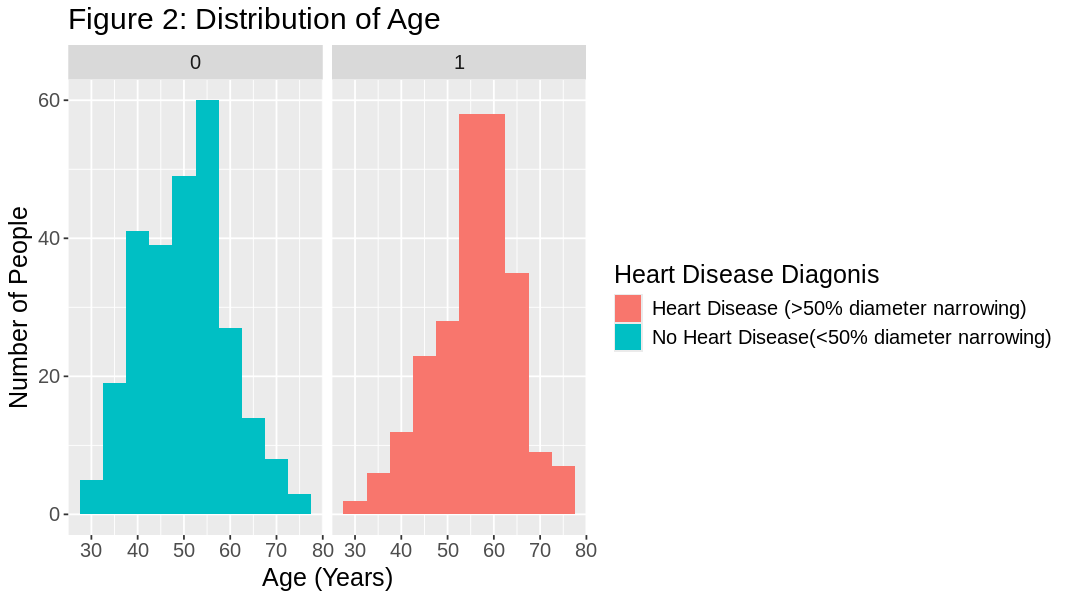

In [50]:
plot_age

- As age increases, the risk of cardiovascular should increase for both sexes (Jousilahti et. al 1999).
- In the data, the distribution for `num = 0` is slightly skewed towards the left, or toward a younger age, where `num = 1` (when heart disease is present) it is skewed more towards the right (Figure 1).
- In the model, this might mean a higher age will make the model more likely the presence of heart disease.

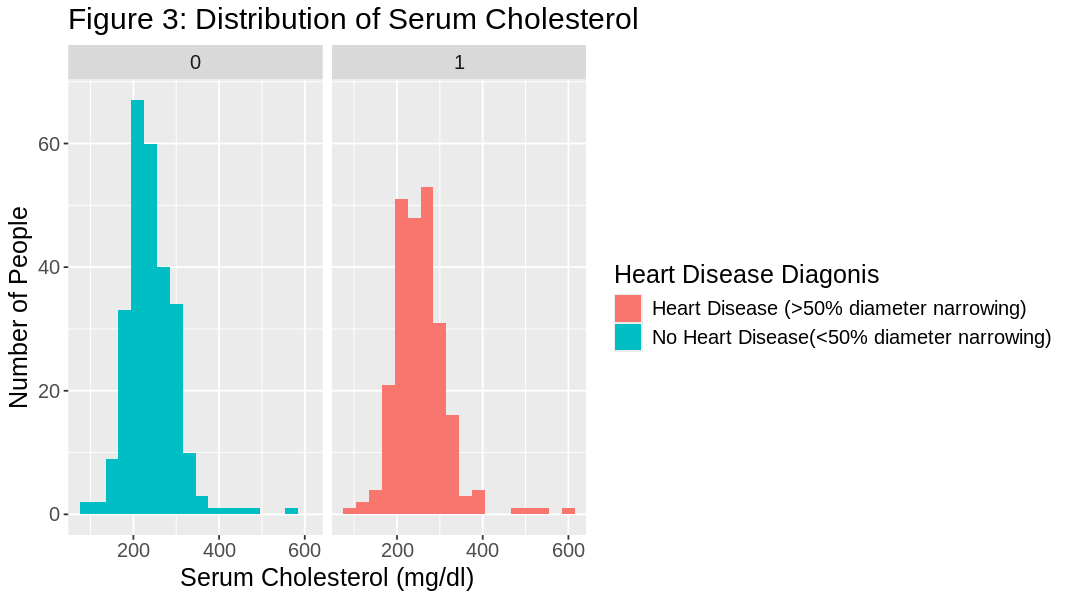

In [51]:
plot_chol

- High serum cholesterol is another well-known risk factor of heart disease (Hajar, 2017), as cholesterol directly affects cardiovascular health.
- We see that for those without heart disease (`num = 0`) it peaks at just under 200mg/dl. On the other hand, `num = 1` has a type of peak around 200-300. So, the trend of higher serum cholesterol being related with heart disease seems to be represented in the data.

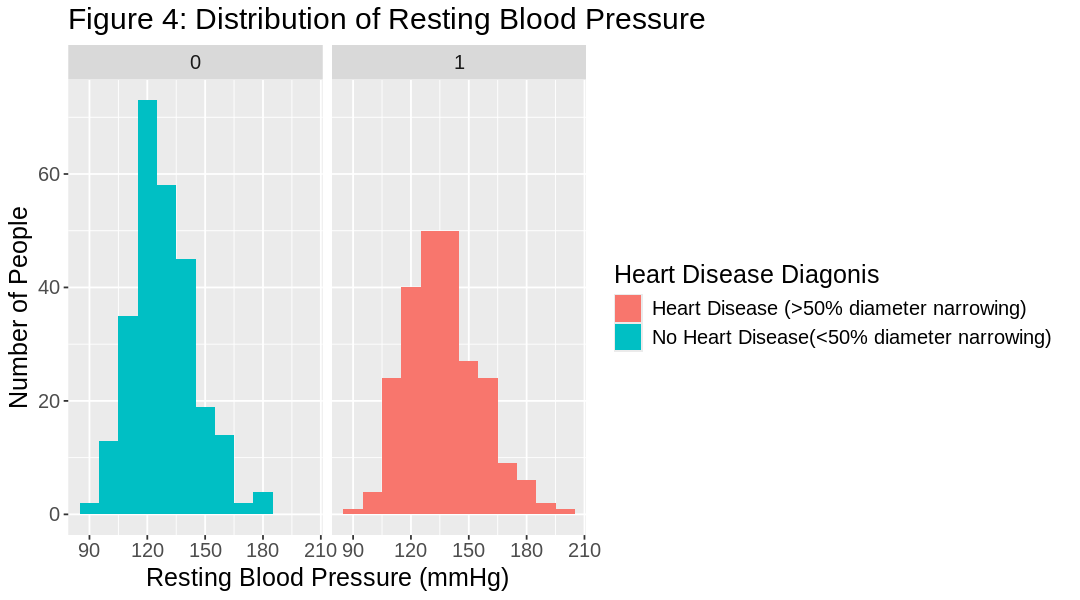

In [52]:
plot_trestbps

- High blood pressure also increases the risk of cardiovascular diseases (Hajar, 2017), as it affects the health of blood vessels.
- It appears that when `num=0`, the distribution is skewed towards slightly lower values. The distribution of `trestbps` when `num = 1`, which has a comparatively more even distribution. So the pattern is represented in the training data.

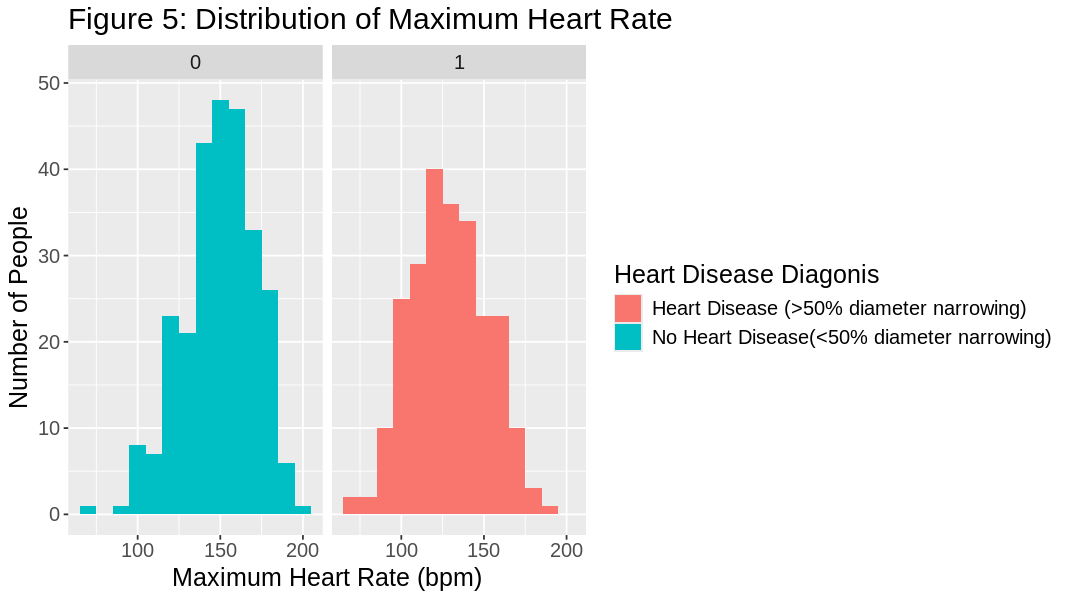

In [53]:
plot_thalach

- Maximal heart rate during exercise and the risk of cardiovascular disease are *inversely* correlated (Savonen et al., 2006).
- The distribution of `thalach` (maximal heart rate) shows this. For those without heart disease (`num = 0`), the distribution has a rough peak around 150bpm. For those with heart disease, the data seems to be slightly centered around a lower value.

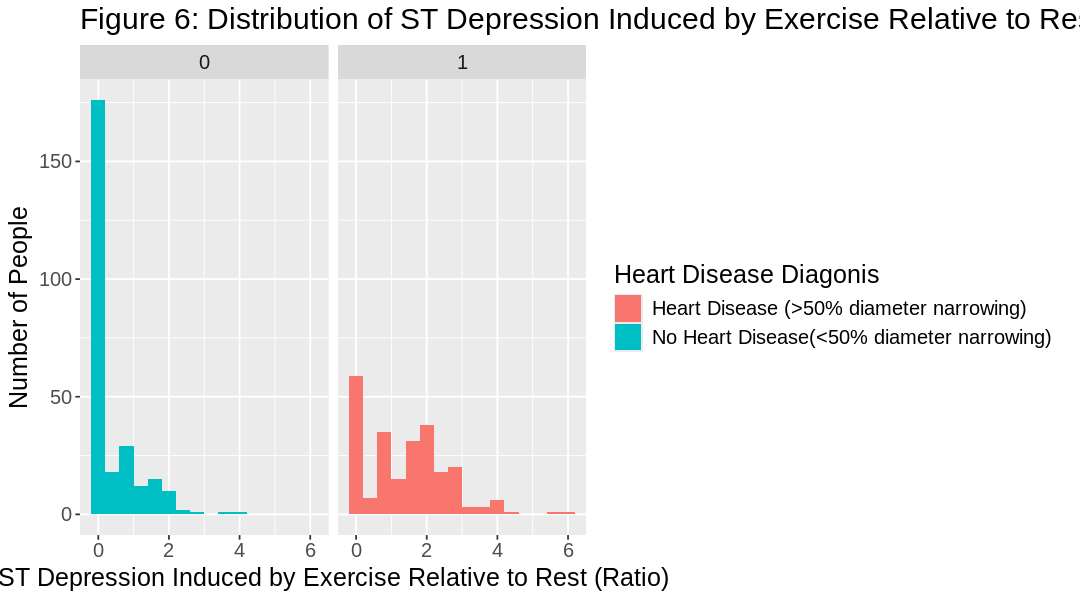

In [54]:
plot_oldpeak

- ST depression is a pattern observed on an ECG measurement. The frequency of ST depressions, both while the patient is exercising or resting, can help predict of heart disease (Lanza et al., 2004).
- `oldpeaks` is the ratio of ST depression while exercising to ST depression while resting.
- When `num = 1` the oldpeaks values are generally higher than when `num = 0` (Figure 6). Patients without heart disease (`num = 0`) mostly have an oldpeaks value of 0 (no ST depressions).
- So, this might indicate that our model will be more likely to predict patients with high oldpeaks values as having heart disease.

It seems that all of **`age`, `chol`, `trestbps`, `thalach`** and **`oldpeaks`** may be relevant to predict `num`.

### 3. KNN Classification

Let's begin the *k*-nearest neighbour classification using these predictors.

1. A 'recipe' will be used to scale the data in such a way that no feature outweighs another in the analysis.
2. We then use the `tune()` and `vfold()` function to generate a tune the number of neighbours needed using a 5-fold **cross validation**. Cross validation allows us to evaluate the model using different splits of training data, resulting in a better estimate of the model's accuracy.
3. Then we add the model to a workflow and collect the accuracy for each number of neighbors used, *k*, from 1 to 30. This allows us to select the best k value.

In [55]:
# Recipe (standardization)
set.seed(1234)

heart_recipe <- recipe(num ~ ., data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Define model specification - tune neighbors using 5-fold cross validation
heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_vfold <- vfold_cv(heart_train, v = 5, strata = num)
vals <- tibble(neighbors = seq(from = 1, to = 25))

heart_accuracy <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_tune) |>
    tune_grid(resamples = heart_vfold, grid = vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    arrange(neighbors)

Let's use `ggplot()` to visualize the accuracy against the number of neighbors.

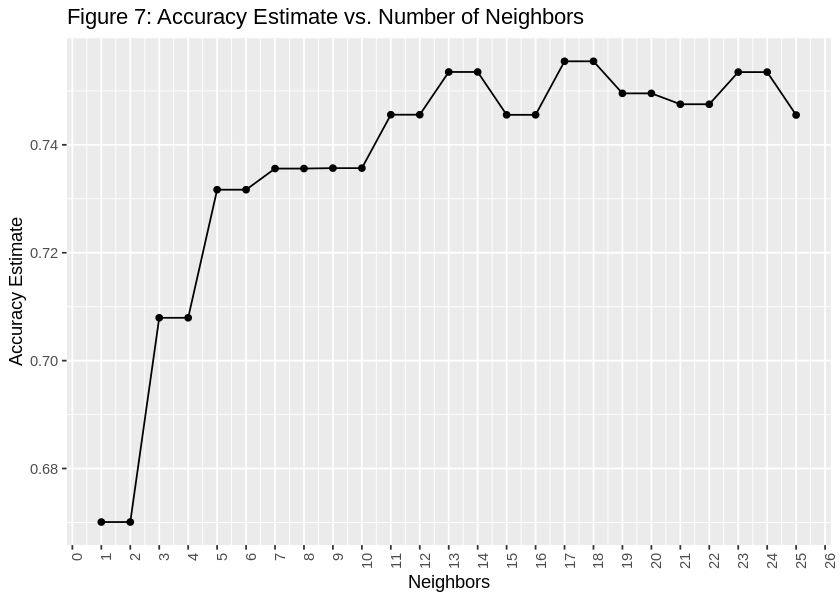

In [56]:
# Generate graph of accuracy
options(repr.plot.width = 7)
k_accuracies <- ggplot(heart_accuracy, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Figure 7: Accuracy Estimate vs. Number of Neighbors") +
       scale_x_continuous(breaks = seq(0, 100, by = 1)) +
       theme(axis.text.x = element_text(angle = 90, hjust = 1))

k_accuracies

- We can extract the best *k*-value by highest accuracy using and use `summarize()` to determine the accuracy.

In [57]:
# Determine best k

best_k <- heart_accuracy |>
    arrange(-mean) |>
    slice(1) |> # there are tied neighbour values (slice_min would give us both)
    select(neighbors) |>
    pull()

best_k

best_train_accuracy <- heart_accuracy |>
    summarize(accuracy = max(mean)) |>
    pull()

percent(best_train_accuracy)

[1] 17

[1] "76%"

We train our knn model accordingly with `k = 17` and fit it to our training data `heart_train`.

In [37]:
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_resample_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_spec) |>
    fit(data = heart_train)

heart_resample_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(17L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2564612
Best kernel: rectangular
Best k: 17

- Using the `predict` function, we can generate predicted `num` values for the testing data.
- After using the `bind_cols()` to connect the predictions to the original data, `metrics()` can provide us with measurements about its accuracy.

In [38]:
# Prediction on the testing data
heart_test_predict = predict(heart_resample_fit, heart_test)|>
    bind_cols(heart_test)

# heart_train_resample_predict
heart_test_accuracy <- metrics(data = heart_test_predict, truth = num, estimate = .pred_class) |>
    filter(.metric == "accuracy")|>
    pull()

heart_test_accuracy

[1] 0.6923077

The testing accuracy is `69%`, an average accuracy that is too low for this model to be used for real-life screening. Let's also generate a *confusion matrix*.

In [39]:
# Confusion Matrix
confusion <- heart_test_predict |>
             conf_mat(truth = num, estimate = .pred_class)

recall = heart_test_predict |> 
        recall(truth = num, estimate = .pred_class, event_level = "second") |>
        select(.metric, .estimate)
precision = heart_test_predict |> 
        precision(truth = num, estimate = .pred_class, event_level = "second") |>
        select(.metric, .estimate)

confusion

          Truth
Prediction  0  1
         0 75 38
         1 14 42

The confusion matrix shows a relatively high value of false negative (38) in which a person is predicted not to have a potential heart disease (predicted `num=0`) but actually has heart disease (actually `num=1`). This may have implications for the model to be used in real-life situations, so let's summarize the matrix into: precision and recall.

In [40]:
metrics <- bind_rows(recall, precision)
metrics

.metric,.estimate
<chr>,<dbl>
recall,0.525
precision,0.750


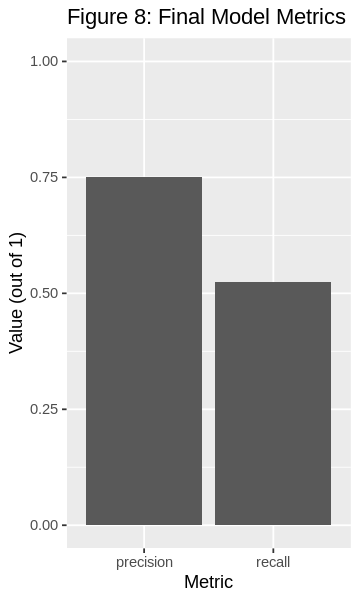

In [41]:
# Visualize recall vs precision
options(repr.plot.width = 3)
options(repr.plot.height = 5)

metrics_plot <- metrics |>
    ggplot(aes(x = .metric, y = .estimate)) +
    geom_bar(stat="identity") +
    labs(x = "Metric", y = "Value (out of 1)") +
    ggtitle("Figure 8: Final Model Metrics") +
    scale_y_continuous(limits = c(0, 1))
    
metrics_plot

The low recall value (52.5%) makes the model less acceptable to be used for screening. If the model missed almost 50% of positive predictions, this means it would miss many people in real life who *do* have the disease, which dangerous.

## Discussion
____

Around 70% accuracy is acceptable for a model, although it is slightly low to be used to screen disease in real life. Further analysis done by calculating precision and recall indicates that the model must be improved. In particular, the model has low recall, which as mentioned, indicates it is likely to miss positive diagnoses. To have real-world applications, we must improve the model's accuracy, and particularly its recall. This can be done by having a larger data set and using  more predictors. In the future, the categorical variables can be preprocessed and used to increase the number of predictors.

It was found that a K-value of 17 provides the highest cross-validation training accuracy estimate in a range from 1 to 20. Considering that the value of accuracy does not change much as the K-value changes slightly and that it does not create a high computational cost, a K-value of 17 is selected as a reasonable *k*-value for the model. However, exploring a wider range of *k*-values may improve the accuracy of the model in the future.

Additionally, recognizing the primary risk factors for heart disease is crucial for reducing mortality risks due to a heart disease. Further investigation can be done into the 'feature importance' or the relative importance of each predictor in the analysis, to help us understand which risk factors are most important.

Considering the small amount of data, this model is as we expected. We can further develop this model to predict heart disease using patients’ information. This may be used to screen patients in the future, improving people's health and reducing the burden on the health system.

All in all, we built a decent model to predict a heart disease diagnosis based on age, serum cholesterol, resting blood pressure, maximum heart rate, and exercised-induced ST Depression, using KNN Classification. However, the accuracy of this model should first be improved to be sufficient for practical real-life application. 

____
## Citations
Hajar, R. (2017). Risk factors for coronary artery disease: Historical perspectives. Heart Views, 18(3), 109–109. https://doi.org/10.4103/heartviews.heartviews_106_17


Janosi, A., Steinbrunn, W., Pfisterer, M., Detrano, R. Heart Disease UCI Machine Learning Repository [Data set]. https://doi.org/10.24432/C52P4X

Heart Disease and Stroke. (2022 8 September). CDC. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=The%20Nation's%20Risk%20Factors%20and,unhealthy%20diet%2C%20and%20physical%20inactivity.

Jousilahti, P., Vartiainen, E., Tuomilehto, J., Puska, P. Sex, Age, Cardiovascular Risk Factors, and Coronary Heart Disease. (1999). Circulation, 99, 1165-1172. https://doi.org/10.1161/01.CIR.99.9.1165

Lanza, G. A., Mustilli, M., Sestito, A., Infusino, F., Sgueglia, G. A., Crea, F. (2004). Diagnostic and prognostic value of ST segment depression limited to the recovery phase of exercise stress test. *Heart, 90*(12), 1417-1421. https://doi.org/10.1136/hrt.2003.031260

Savonen, K., Lakka, T. A., Laukkanen, J. A., Halonen, P. M., Rauramaa, T. H., Salonen, J. T., Rauramaa, R. (2006). Heart rate response during exercise test and cardiovascular mortality in middle-aged men. *European Heart Journal, 27*(5), 582-588. https://doi.org/10.1093/eurheartj/ehi708

Cover, Thomas, and Peter Hart. 1967. “Nearest Neighbor Pattern Classification.” IEEE Transactions on Information Theory 13 (1): 21–27.
Fix, Evelyn, and Joseph Hodges. 1951. “Discriminatory Analysis. Nonparametric Discrimination: Consistency Properties.” USAF School of Aviation Medicine, Randolph Field, Texas.
Cover, Thomas, and Peter Hart. 1967. “Nearest Neighbor Pattern Classification.” IEEE Transactions on Information Theory 13 (1): 21–27.

Fix, Evelyn, and Joseph Hodges. 1951. “Discriminatory Analysis. Nonparametric Discrimination: Consistency Properties.” USAF School of Aviation Medicine, Randolph Field, Texas.

